# Project-14-Restaurant Food Cost

In [1]:
## importing the essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## loading the dataset :
train=pd.read_excel('Data_Train.xlsx.xls')
test=pd.read_excel('Data_Test.xlsx.xls')

In [3]:
## lets check the first five records :
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
data=pd.concat([train,test],ignore_index=True)

In [6]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [7]:
## check the rows and columns of the dataset:
data.shape

(16921, 9)

In [8]:
data.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
dtype: object

In [9]:
## total information of the dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [10]:
## lets check the null values :
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
dtype: int64

In [11]:
data['CITY'].value_counts().head(10)

Chennai         2855
Bangalore       2835
Hyderabad       2458
Mumbai          2311
New Delhi       1754
Kochi           1751
Gurgaon          524
Secunderabad     396
Noida            274
Navi Mumbai      222
Name: CITY, dtype: int64

In [12]:
data['CITY']=data.fillna('None')

In [13]:
data['LOCALITY']=data.fillna('None')

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
data['CITY']=le.fit_transform(data['CITY'])

In [16]:
data['LOCALITY']=le.fit_transform(data['LOCALITY'])

In [17]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              4
VOTES            1606
COST             4231
dtype: int64

In [18]:
data['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [19]:
data['RATING'].describe()

count     16917
unique       32
top         3.9
freq       1643
Name: RATING, dtype: object

In [20]:
data['RATING'].replace('NEW',1.0,inplace=True)

In [21]:
data['RATING'].replace('-',0,inplace=True)

In [22]:
data['RATING'].fillna(1,inplace=True)

In [23]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES            1606
COST             4231
dtype: int64

In [24]:
data['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2159 votes',
       '3807 votes', '1913 votes'], dtype=object)

In [25]:
data['VOTES'].describe()

count        15315
unique        2075
top       44 votes
freq            92
Name: VOTES, dtype: object

In [26]:
data['VOTES'].value_counts()

44 votes      92
22 votes      88
6 votes       87
29 votes      83
26 votes      81
              ..
4181 votes     1
1818 votes     1
1454 votes     1
849 votes      1
7354 votes     1
Name: VOTES, Length: 2075, dtype: int64

In [27]:
data['VOTES'].fillna(0,inplace=True)

In [28]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
dtype: int64

In [29]:
data['COST'].unique()

array([ 1200.,  1500.,   800.,   300.,   600.,  1600.,   200.,   900.,
         400.,  1400.,   350.,   500.,   450.,   700.,  1000.,   250.,
        2000.,  1100.,   100.,   850.,  2500.,  1800.,   150.,   650.,
        3500.,   750.,   950.,  1300.,   180.,  2100.,   550.,    50.,
        1900.,  1750.,  1350.,    60.,  2200.,  5000.,    80.,  3300.,
        3800.,  1450.,  4000.,  2800.,   120.,  4500.,  2400.,  1700.,
        3000.,  2600.,  5200., 14000.,  1550.,  4200.,  3700.,  1150.,
        2700.,   130.,  8000.,  3200.,  5500.,  6500.,  1050., 10000.,
        3600.,   313.,  3400.,  2300.,  3100.,  1250.,    20.,  1650.,
        1850.,  6000.,   140.,  4100.,  4050.,  2900.,   599.,  7000.,
         299.,   370.,  1950.,   320.,  1260.,    70.,    nan])

In [30]:
data['COST'].describe()

count    12690.000000
mean       655.252246
std        627.003540
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64

In [31]:
data.head(2)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",34,34,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),36,36,4.2,30 votes,1500.0


In [32]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
dtype: int64

In [33]:
data['COST'].unique()

array([ 1200.,  1500.,   800.,   300.,   600.,  1600.,   200.,   900.,
         400.,  1400.,   350.,   500.,   450.,   700.,  1000.,   250.,
        2000.,  1100.,   100.,   850.,  2500.,  1800.,   150.,   650.,
        3500.,   750.,   950.,  1300.,   180.,  2100.,   550.,    50.,
        1900.,  1750.,  1350.,    60.,  2200.,  5000.,    80.,  3300.,
        3800.,  1450.,  4000.,  2800.,   120.,  4500.,  2400.,  1700.,
        3000.,  2600.,  5200., 14000.,  1550.,  4200.,  3700.,  1150.,
        2700.,   130.,  8000.,  3200.,  5500.,  6500.,  1050., 10000.,
        3600.,   313.,  3400.,  2300.,  3100.,  1250.,    20.,  1650.,
        1850.,  6000.,   140.,  4100.,  4050.,  2900.,   599.,  7000.,
         299.,   370.,  1950.,   320.,  1260.,    70.,    nan])

In [34]:
data['COST'].describe()

count    12690.000000
mean       655.252246
std        627.003540
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64

In [35]:
data['COST'].fillna(data['COST'].mean(),inplace=True)

In [36]:
data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [37]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",34,34,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),36,36,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",34,34,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),104,104,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),55,55,3.8,165 votes,300.0


In [38]:
data.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY               int32
LOCALITY           int32
RATING            object
VOTES             object
COST             float64
dtype: object

In [39]:
data['RATING']= data['RATING'].astype(str).astype(float)

In [40]:
data.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY               int32
LOCALITY           int32
RATING           float64
VOTES             object
COST             float64
dtype: object

In [41]:
data['VOTES'].isnull().sum()

0

In [42]:
data['VOTES'].loc[data['VOTES'].str[-5:]=='votes']=data['VOTES'].loc[data['VOTES'].str[-5:]=='votes'].str.rstrip('votes')

C:\Users\sagar\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
#lets now convert the "VOTES" column to int
data["VOTES"]=data["VOTES"].astype(int)

In [44]:
data.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY               int32
LOCALITY           int32
RATING           float64
VOTES              int32
COST             float64
dtype: object

In [45]:
data.head(2)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",34,34,3.6,49,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),36,36,4.2,30,1500.0


In [46]:
## importing the labelencoder to convert object datatypes to numerical values :
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i]=le.fit_transform(data[i])

In [48]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,34,9438,3294,898,34,34,3.6,49,1200.0
1,36,13198,364,2301,36,36,4.2,30,1500.0
2,34,10915,3729,806,34,34,3.8,221,800.0
3,104,6346,5156,340,104,104,4.1,24,800.0
4,55,15387,2218,750,55,55,3.8,165,300.0


In [49]:
data.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000
mean,65.004137,7767.211631,2801.322380,1446.928491,65.004137,65.004137,3.480480,379.407836,655.252246
std,35.875571,4493.287626,1504.771403,925.974559,35.875571,35.875571,1.033358,808.451565,542.979598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,34.000000,3873.000000,1478.000000,681.000000,34.000000,34.000000,3.400000,40.000000,350.000000
50%,64.000000,7751.000000,3054.000000,1372.000000,64.000000,64.000000,3.800000,133.000000,600.000000
75%,104.000000,11672.000000,4008.000000,2265.000000,104.000000,104.000000,4.000000,409.000000,655.252246
max,122.000000,15573.000000,5182.000000,3294.000000,122.000000,122.000000,4.900000,41186.000000,14000.000000


In [50]:
dfr=data.corr()
dfr

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,-0.000310,0.248437,0.053529,1.000000,1.000000,-0.096438,-0.133843,-0.229436
RESTAURANT_ID,-0.000310,1.000000,0.055246,0.007905,-0.000310,-0.000310,0.034545,0.001003,0.035346
CUISINES,0.248437,0.055246,1.000000,0.106064,0.248437,0.248437,-0.019823,-0.035499,-0.012273
TIME,0.053529,0.007905,0.106064,1.000000,0.053529,0.053529,-0.038623,-0.015098,0.015602
CITY,1.000000,-0.000310,0.248437,0.053529,1.000000,1.000000,-0.096438,-0.133843,-0.229436
LOCALITY,1.000000,-0.000310,0.248437,0.053529,1.000000,1.000000,-0.096438,-0.133843,-0.229436
RATING,-0.096438,0.034545,-0.019823,-0.038623,-0.096438,-0.096438,1.000000,0.273394,0.214950
VOTES,-0.133843,0.001003,-0.035499,-0.015098,-0.133843,-0.133843,0.273394,1.000000,0.223447
COST,-0.229436,0.035346,-0.012273,0.015602,-0.229436,-0.229436,0.214950,0.223447,1.000000


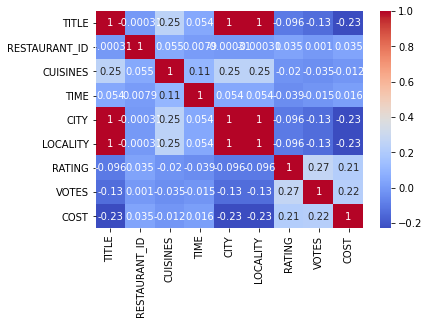

In [51]:
sns.heatmap(dfr,annot=True,cmap='coolwarm')
plt.show()

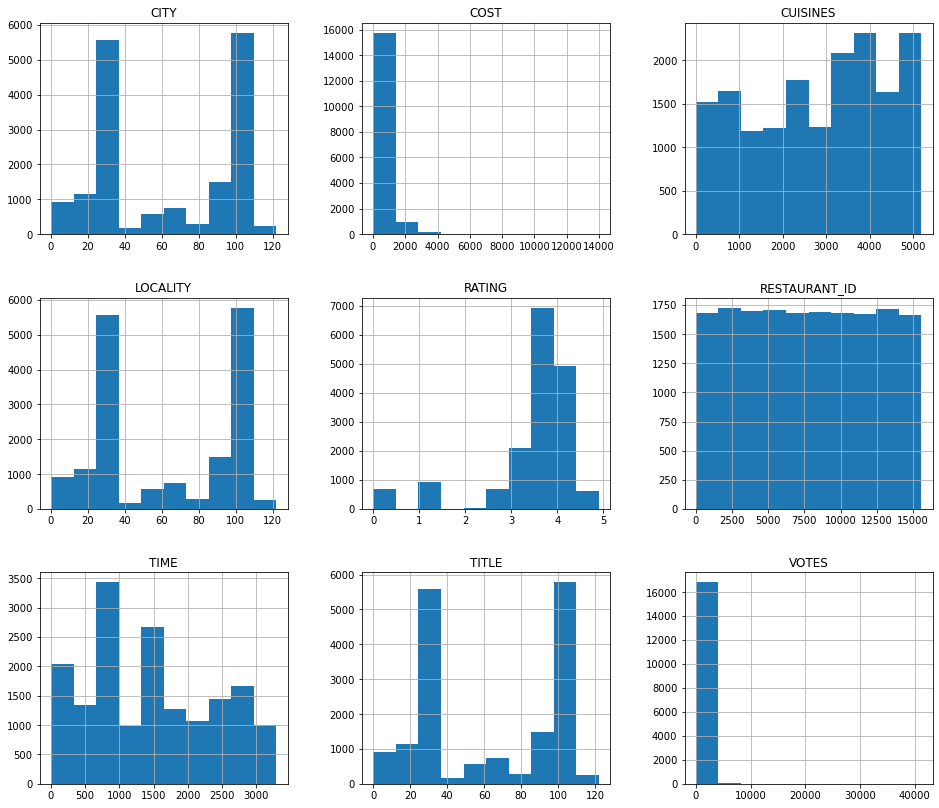

In [52]:
data.hist(figsize=(16,14))
plt.show()

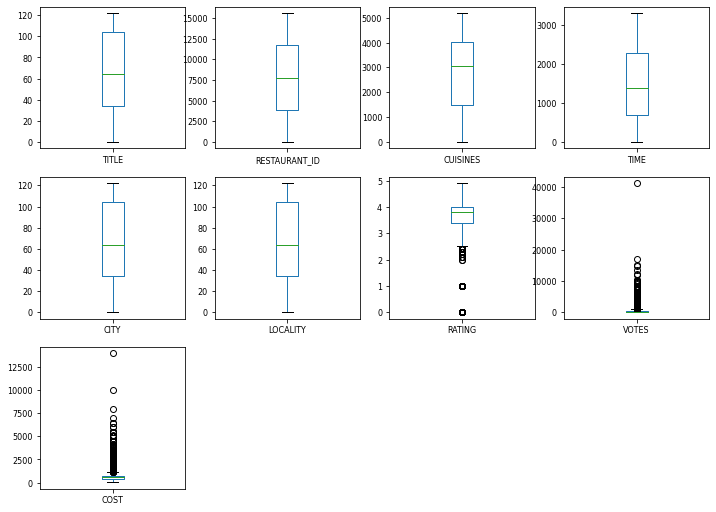

In [53]:
## checking outliers :
data.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))
plt.show()

In [54]:
data.skew()

TITLE            -0.061023
RESTAURANT_ID     0.006775
CUISINES         -0.229200
TIME              0.302563
CITY             -0.061023
LOCALITY         -0.061023
RATING           -2.156308
VOTES            12.704645
COST              4.594323
dtype: float64

In [55]:
## lets treat the skewness in the input dataset :
import numpy as np
for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.log1p(data[index])
    if data.skew().loc[index]<-0.5:
        data[index]=np.square(data[index])

In [56]:
data.skew()

TITLE           -0.061023
RESTAURANT_ID    0.006775
CUISINES        -0.229200
TIME             0.302563
CITY            -0.061023
LOCALITY        -0.061023
RATING          -1.218944
VOTES            0.433548
COST             0.117974
dtype: float64

In [57]:
## splitting the data into input and output :
X=data.drop('COST',axis=1)
y=data['COST']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
## importing the standard scaler:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [60]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [61]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)

In [62]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [63]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression()
R2_score =  0.22767706130909593
Mean_Squared_Error = 0.31455551998873155
Cross_Val_Score =  0.19655703654368822


********************************* Lasso *********************************

 Lasso()
R2_score =  0.2137508267463306
Mean_Squared_Error = 0.32022746592601115
Cross_Val_Score =  0.17541505366838991


********************************* Ridge *********************************

 Ridge()
R2_score =  0.2276770600130945
Mean_Squared_Error = 0.31455552051657343
Cross_Val_Score =  0.19655702955004123


********************************* DecisionTreeRegressor *********************************

 DecisionTreeRegressor(random_state=42)
R2_score =  0.029317073986239284
Mean_Squared_Error = 0.39534456020947134
Cross_Val_Score =  0.13637222301884597


********************************* KNeighborsRegressor *********************************

 KNeighborsRegressor()
R2_score =  0.06393480075854

In [64]:
final= pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
final

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.227677,0.315,0.196557
1,Lasso,0.213751,0.320,0.175415
2,Ridge,0.227677,0.315,0.196557
3,DecisionTreeRegressor,0.029317,0.395,0.136372
4,KNeighborsRegressor,0.063935,0.381,0.080620
5,AdaBoostRegressor,0.365262,0.259,0.322257
6,RandomForestRegressor,0.508150,0.200,0.453169
7,GradientBoostingRegressor,0.501980,0.203,0.439021


## Conclusion: we will chose AdaBoostRegressor as it has less R2_score and Mean_Squared_Error

In [65]:
import joblib
joblib.dump(ABR,'Foodcost.csv')

['Foodcost.csv']

In [66]:
model=joblib.load('Foodcost.csv')

In [67]:
model.predict(X_test)

array([6.61829553, 6.49579618, 6.47655617, ..., 6.25226885, 6.34641093,
       6.34641093])